## 線性回歸

In [52]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 準備模擬資料
做一條直線

f(x) = 1.2x + 0.8

準備50個點

In [2]:
x = np.linspace(0, 5, 50)

In [3]:
y = 1.2 * x + 0.8

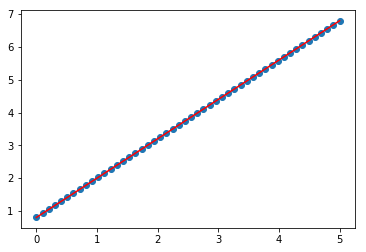

In [5]:
plt.scatter(x, y)
plt.plot(x, y, 'r')

加入noise(誤差)項

In [6]:
y = 1.2 * x + 0.8 + 0.6*np.random.randn(50)

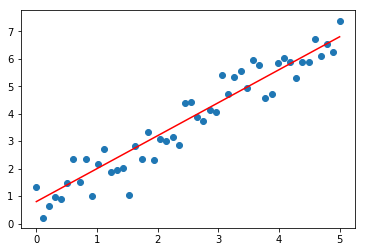

In [9]:
plt.scatter(x, y)
plt.plot(x, 1.2*x+0.8, 'r')

做線性回歸找出那條線

In [10]:
x

array([0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
       0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
       1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
       1.53061224, 1.63265306, 1.73469388, 1.83673469, 1.93877551,
       2.04081633, 2.14285714, 2.24489796, 2.34693878, 2.44897959,
       2.55102041, 2.65306122, 2.75510204, 2.85714286, 2.95918367,
       3.06122449, 3.16326531, 3.26530612, 3.36734694, 3.46938776,
       3.57142857, 3.67346939, 3.7755102 , 3.87755102, 3.97959184,
       4.08163265, 4.18367347, 4.28571429, 4.3877551 , 4.48979592,
       4.59183673, 4.69387755, 4.79591837, 4.89795918, 5.        ])

In [11]:
y

array([1.33542237, 0.21957363, 0.65540912, 0.97065779, 0.88358428,
       1.46211876, 2.36047494, 1.5238609 , 2.33287178, 0.98972951,
       2.16980056, 2.72920941, 1.85984509, 1.95939845, 2.01107697,
       1.03837403, 2.81400577, 2.33955041, 3.34845595, 2.299981  ,
       3.07262633, 2.98771988, 3.1600621 , 2.85541425, 4.40552862,
       4.40960118, 3.86806662, 3.75134135, 4.13869898, 4.06940052,
       5.41447402, 4.72537435, 5.33308821, 5.57166347, 4.93737937,
       5.96262592, 5.75678958, 4.5870608 , 4.71987878, 5.85960015,
       6.03920331, 5.86790264, 5.3097174 , 5.88279963, 5.86435461,
       6.72825882, 6.11410617, 6.52834424, 6.25402649, 7.38796428])

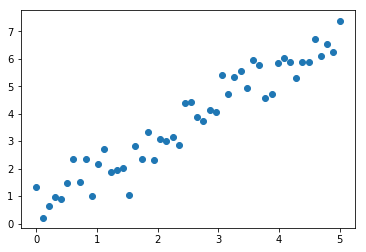

In [12]:
plt.scatter(x, y)

原本x是[x1, x2, x3,...]

要變成[[x1], [x2], [x3],...]

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
regr = LinearRegression()

In [15]:
X = x.reshape(50, 1)

In [17]:
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
Y = regr.predict(X)

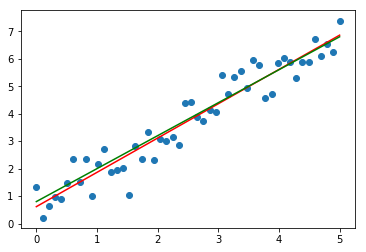

In [21]:
plt.scatter(x, y)
plt.plot(x, Y, 'r')
plt.plot(x, 1.2*x+0.8, 'g')

## Overfitting

In [22]:
from ipywidgets import interact

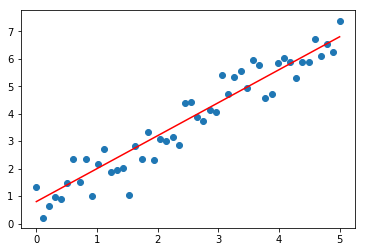

In [24]:
plt.scatter(x, y)
plt.plot(x, 1.2*x + 0.8, 'r')

In [25]:
X = np.linspace(0, 5, 1000)

def my_fit(n):
    Y = 4*np.sin(n*X)+4
    plt.scatter(x, y)
    plt.plot(X, Y, 'r')
    plt.show()

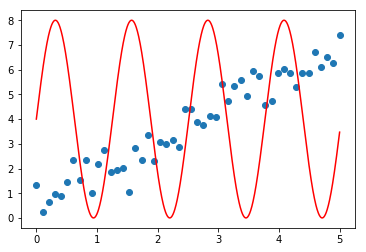

In [26]:
my_fit(5)

In [27]:
interact(my_fit, n=(1,500))

interactive(children=(IntSlider(value=250, description='n', max=500, min=1), Output()), _dom_classes=('widget-…

<function __main__.my_fit(n)>

以上為overfitting

把過去學得太像了

## 標準函數訓練及測試

In [28]:
x = np.linspace(0, 5, 100)
y = 1.2*x + 0.8 + 0.5*np.random.randn(100)

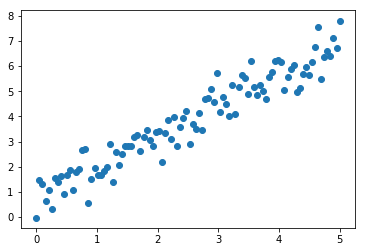

In [29]:
plt.scatter(x,y)

分訓練及測試

In [30]:
from sklearn.model_selection import train_test_split

把原本80%給training data,20%給testing data

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size=0.2,
                                                   random_state=87)

In [35]:
len(x_train)

80

In [36]:
len(x_test)

20

In [37]:
x_train = x_train.reshape(80, 1)

In [38]:
x_test.shape = (20,1)

In [39]:
x_test

array([[0.80808081],
       [4.09090909],
       [4.29292929],
       [1.61616162],
       [1.96969697],
       [1.26262626],
       [1.31313131],
       [1.46464646],
       [3.28282828],
       [0.35353535],
       [4.24242424],
       [5.        ],
       [2.92929293],
       [3.53535354],
       [4.64646465],
       [3.73737374],
       [0.15151515],
       [0.        ],
       [2.22222222],
       [1.66666667]])

只用x_train下去訓練

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
regr = LinearRegression()

In [42]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

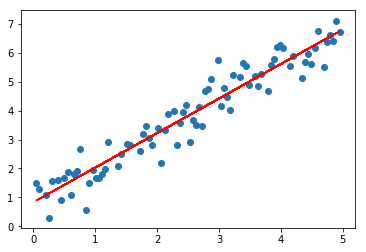

In [43]:
plt.scatter(x_train, y_train)
plt.plot(x_train, regr.predict(x_train), 'r')

用testing data測試

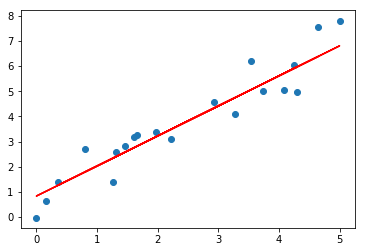

In [46]:
plt.scatter(x_test, y_test)
plt.plot(x_test, regr.predict(x_test), 'r')

## 真實世界的例子

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

scikit-learn裡有真實世界的例子,called "Toy Datasets"

In [48]:
from sklearn.datasets import load_boston

In [54]:
boston = load_boston()

In [55]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [56]:
X = boston.data
Y = boston.target

In [57]:
len(X)

506

In [59]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size=0.3,
                                                   random_state=87)

In [60]:
regr = LinearRegression()

In [61]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [62]:
y_predict = regr.predict(x_test)

Text(0, 0.5, 'Predicted Price')

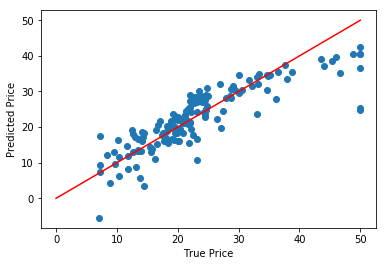

In [64]:
plt.scatter(y_test, y_predict)
plt.plot([0,50], [0,50], 'r')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

解釋數據內容

In [67]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

小技巧-善用enumerate

In [68]:
L = ['a', 'b', 'c']

In [69]:
for i in L:
    print(i)

a
b
c


In [71]:
for i in range(3):
    print(i+1, L[i])

1 a
2 b
3 c


In [72]:
list(enumerate(L))

[(0, 'a'), (1, 'b'), (2, 'c')]

In [73]:
for i in enumerate(L):
    print(i)

(0, 'a')
(1, 'b')
(2, 'c')


In [74]:
for i , s in enumerate(L):
    print(i+1, s)

1 a
2 b
3 c


小技巧-畫多個圖

In [75]:
x = np.linspace(-10,10,200)

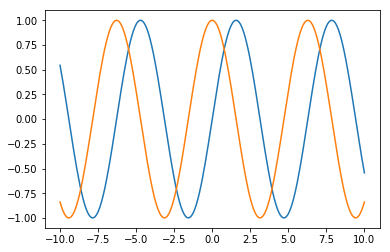

In [76]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

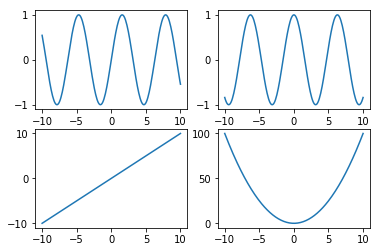

In [77]:
plt.subplot(2, 2, 1)
plt.plot(x, np.sin(x))

plt.subplot(2, 2, 2)
plt.plot(x, np.cos(x))

plt.subplot(2, 2, 3)
plt.plot(x, x)

plt.subplot(2, 2, 4)
plt.plot(x, x**2)

Boston房價與各參數的關係

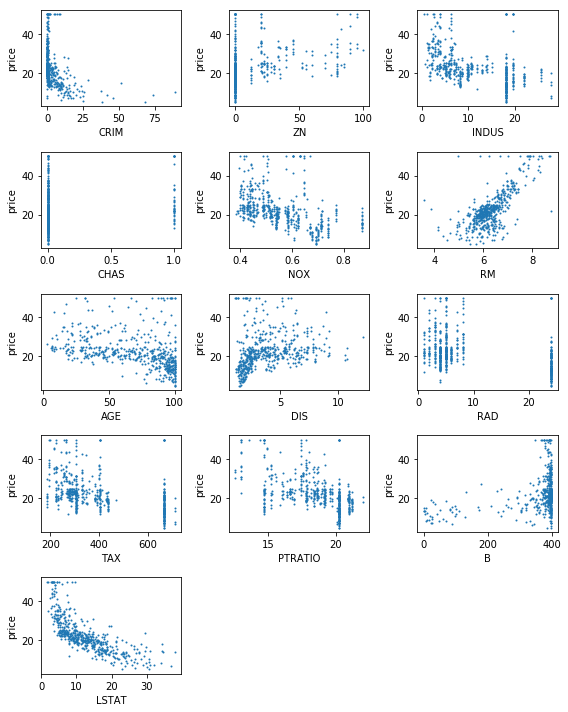

In [78]:
plt.figure(figsize=(8,10))
for i, feature in enumerate(boston.feature_names):
    plt.subplot(5, 3, i+1)
    plt.scatter(X[:,i], Y, s=1)
    plt.ylabel("price")
    plt.xlabel(feature)
    plt.tight_layout()